<a href="https://colab.research.google.com/github/nupatige/Templates_Machine-learning/blob/main/04_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydotplus
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc,classification_report
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

## Read the data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Templates/bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

## Data information

In [ ]:
data.shape

(11162, 17)

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## Exploratory data analysis (EDA) & Data visualization

### checking null values

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

### Correlation check

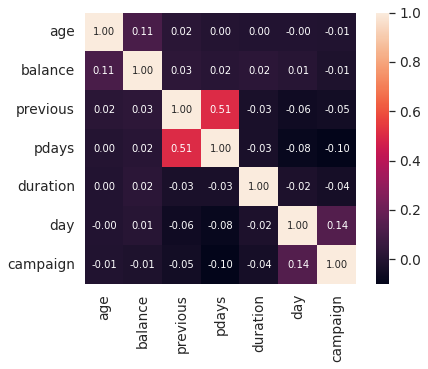

In [ ]:
plt.figure(figsize = (7,5)) # Choose size depening on the required figure size
corrmat = data.corr()
k = 20 # number of varialbes for heat map
cols = corrmat.nlargest(k, 'age')['age'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)

# No correlated columns found

### Checking outliers

In [ ]:
data.describe()

# highe percentage of outliers present in balance, duration, pdays, previous

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
data['balance'].describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

In [ ]:
print('Before : {}'.format(data.shape))
data.drop(data[data['balance']>1708].index,axis=0,inplace=True)
data.drop(data[data['balance']<122].index,axis=0,inplace=True)
print('After : {}'.format(data.shape))

Before : (11162, 17)
After : (5589, 17)


In [ ]:
data['duration'].describe()

count    5589.000000
mean      373.662551
std       350.747520
min         2.000000
25%       139.000000
50%       257.000000
75%       491.000000
max      3881.000000
Name: duration, dtype: float64

In [ ]:
print('Before : {}'.format(data.shape))
data.drop(data[data['duration']>491].index,axis=0,inplace=True)
data.drop(data[data['duration']<139].index,axis=0,inplace=True)
print('After : {}'.format(data.shape))

Before : (5589, 17)
After : (2803, 17)


In [ ]:
data['pdays'].describe()

count    2803.000000
mean       63.668569
std       121.696791
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        92.000000
max       854.000000
Name: pdays, dtype: float64

In [ ]:
print('Before : {}'.format(data.shape))
data.drop(data[data['pdays']>92].index,axis=0,inplace=True)
print('After : {}'.format(data.shape))

Before : (2803, 17)
After : (2109, 17)


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000
mean,40.177335,649.118065,15.251778,272.417734,2.166904,6.206733,0.290185
std,12.203906,429.313694,8.704164,94.895551,1.895672,23.751040,1.215883
min,18.000000,122.000000,1.000000,139.000000,1.000000,-1.000000,0.000000
25%,31.000000,290.000000,7.000000,190.000000,1.000000,-1.000000,0.000000
50%,37.000000,534.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,48.000000,944.000000,22.000000,342.000000,3.000000,-1.000000,0.000000
max,93.000000,1708.000000,31.000000,491.000000,21.000000,92.000000,17.000000


In [ ]:
# The outlier removal totally depends on the available data & the columns you want to treat for outliers.

## Data Preprocessing (Data Transformation)

In [ ]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [ ]:
encoded_df = preprocessor(data)
encoded_df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
20,28,0,0,1,0,785,1,0,2,8,8,442,2,-1,0,3,1
48,53,9,0,0,0,1443,1,0,2,14,8,476,1,-1,0,3,1


## Splitting Input & output Variables (Feature selection)

In [ ]:
x = encoded_df.drop('deposit',axis=1).values
y = encoded_df['deposit'].values

## Train Test Split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=32)

## Decision Tree

### Decision tree with CART (Gini)

In [ ]:
# Instantiate the model
dt_1 = DecisionTreeClassifier(random_state=1,max_depth=6)

# Train the model
dt_1.fit(x_train,y_train)

# Training accuracy
dt_1_score_train = dt_1.score(x_train,y_train)

# Testing accuracy
dt_1_score_test = dt_1.score(x_test,y_test)

# Comparing training & testing accuracy to check overfit or underfit
print('Training Score : {}'.format(dt_1_score_train))
print('Testing Score : {}'.format(dt_1_score_test))

Training Score : 0.7806757557794902
Testing Score : 0.7677725118483413


### Decision tree with C4.5 (Entropy)

In [ ]:
# Instantiate the model
dt_2 = DecisionTreeClassifier(random_state=1,max_depth=6,criterion='entropy')

# Train the model
dt_2.fit(x_train,y_train)

# Training accuracy
dt_2_score_train = dt_2.score(x_train,y_train)

# Testing accuracy
dt_2_score_test = dt_2.score(x_test,y_test)

# Comparing training & testing accuracy to check overfit or underfit
print('Training Score : {}'.format(dt_2_score_train))
print('Testing Score : {}'.format(dt_2_score_test))

Training Score : 0.7937166567871962
Testing Score : 0.7417061611374408


## Hyper-Parameter Optimization using GridSearchCV

In [ ]:
# Set the random state for reproducibility
import time

fit_dt = DecisionTreeClassifier(random_state=1)

np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 4, 6, 8, 10, 12],
              'criterion': ['gini','entropy'],
              'min_samples_split': [100,90,80,70,60,50,40,30,20,10],
              'min_samples_leaf': [20,18,16,14,12,10,8,6,4,2]}

cv_dt = GridSearchCV(fit_dt, cv = 10, param_grid=param_dist, n_jobs = 3)

cv_dt.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_dt.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 50}
Time taken in grid search:  58.18


## Final decision tree after GridSearch CV

In [ ]:
dt = DecisionTreeClassifier(random_state=1,max_depth=12,criterion='gini',min_samples_split=50,min_samples_leaf=2)
dt.fit(x_train, y_train)

dt_score_train = dt.score(x_train, y_train)
print("Training score: ",dt_score_train)

dt_score_test = dt.score(x_test, y_test)
print("Testing score: ",dt_score_test)

Training score:  0.8500296384113811
Testing score:  0.7867298578199052


## Prediction

In [ ]:
y_pred = dt.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,

In [ ]:
# Comparing the predicted y value to actual y_test data.

y_test

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,

## Graphical repesentation of tree

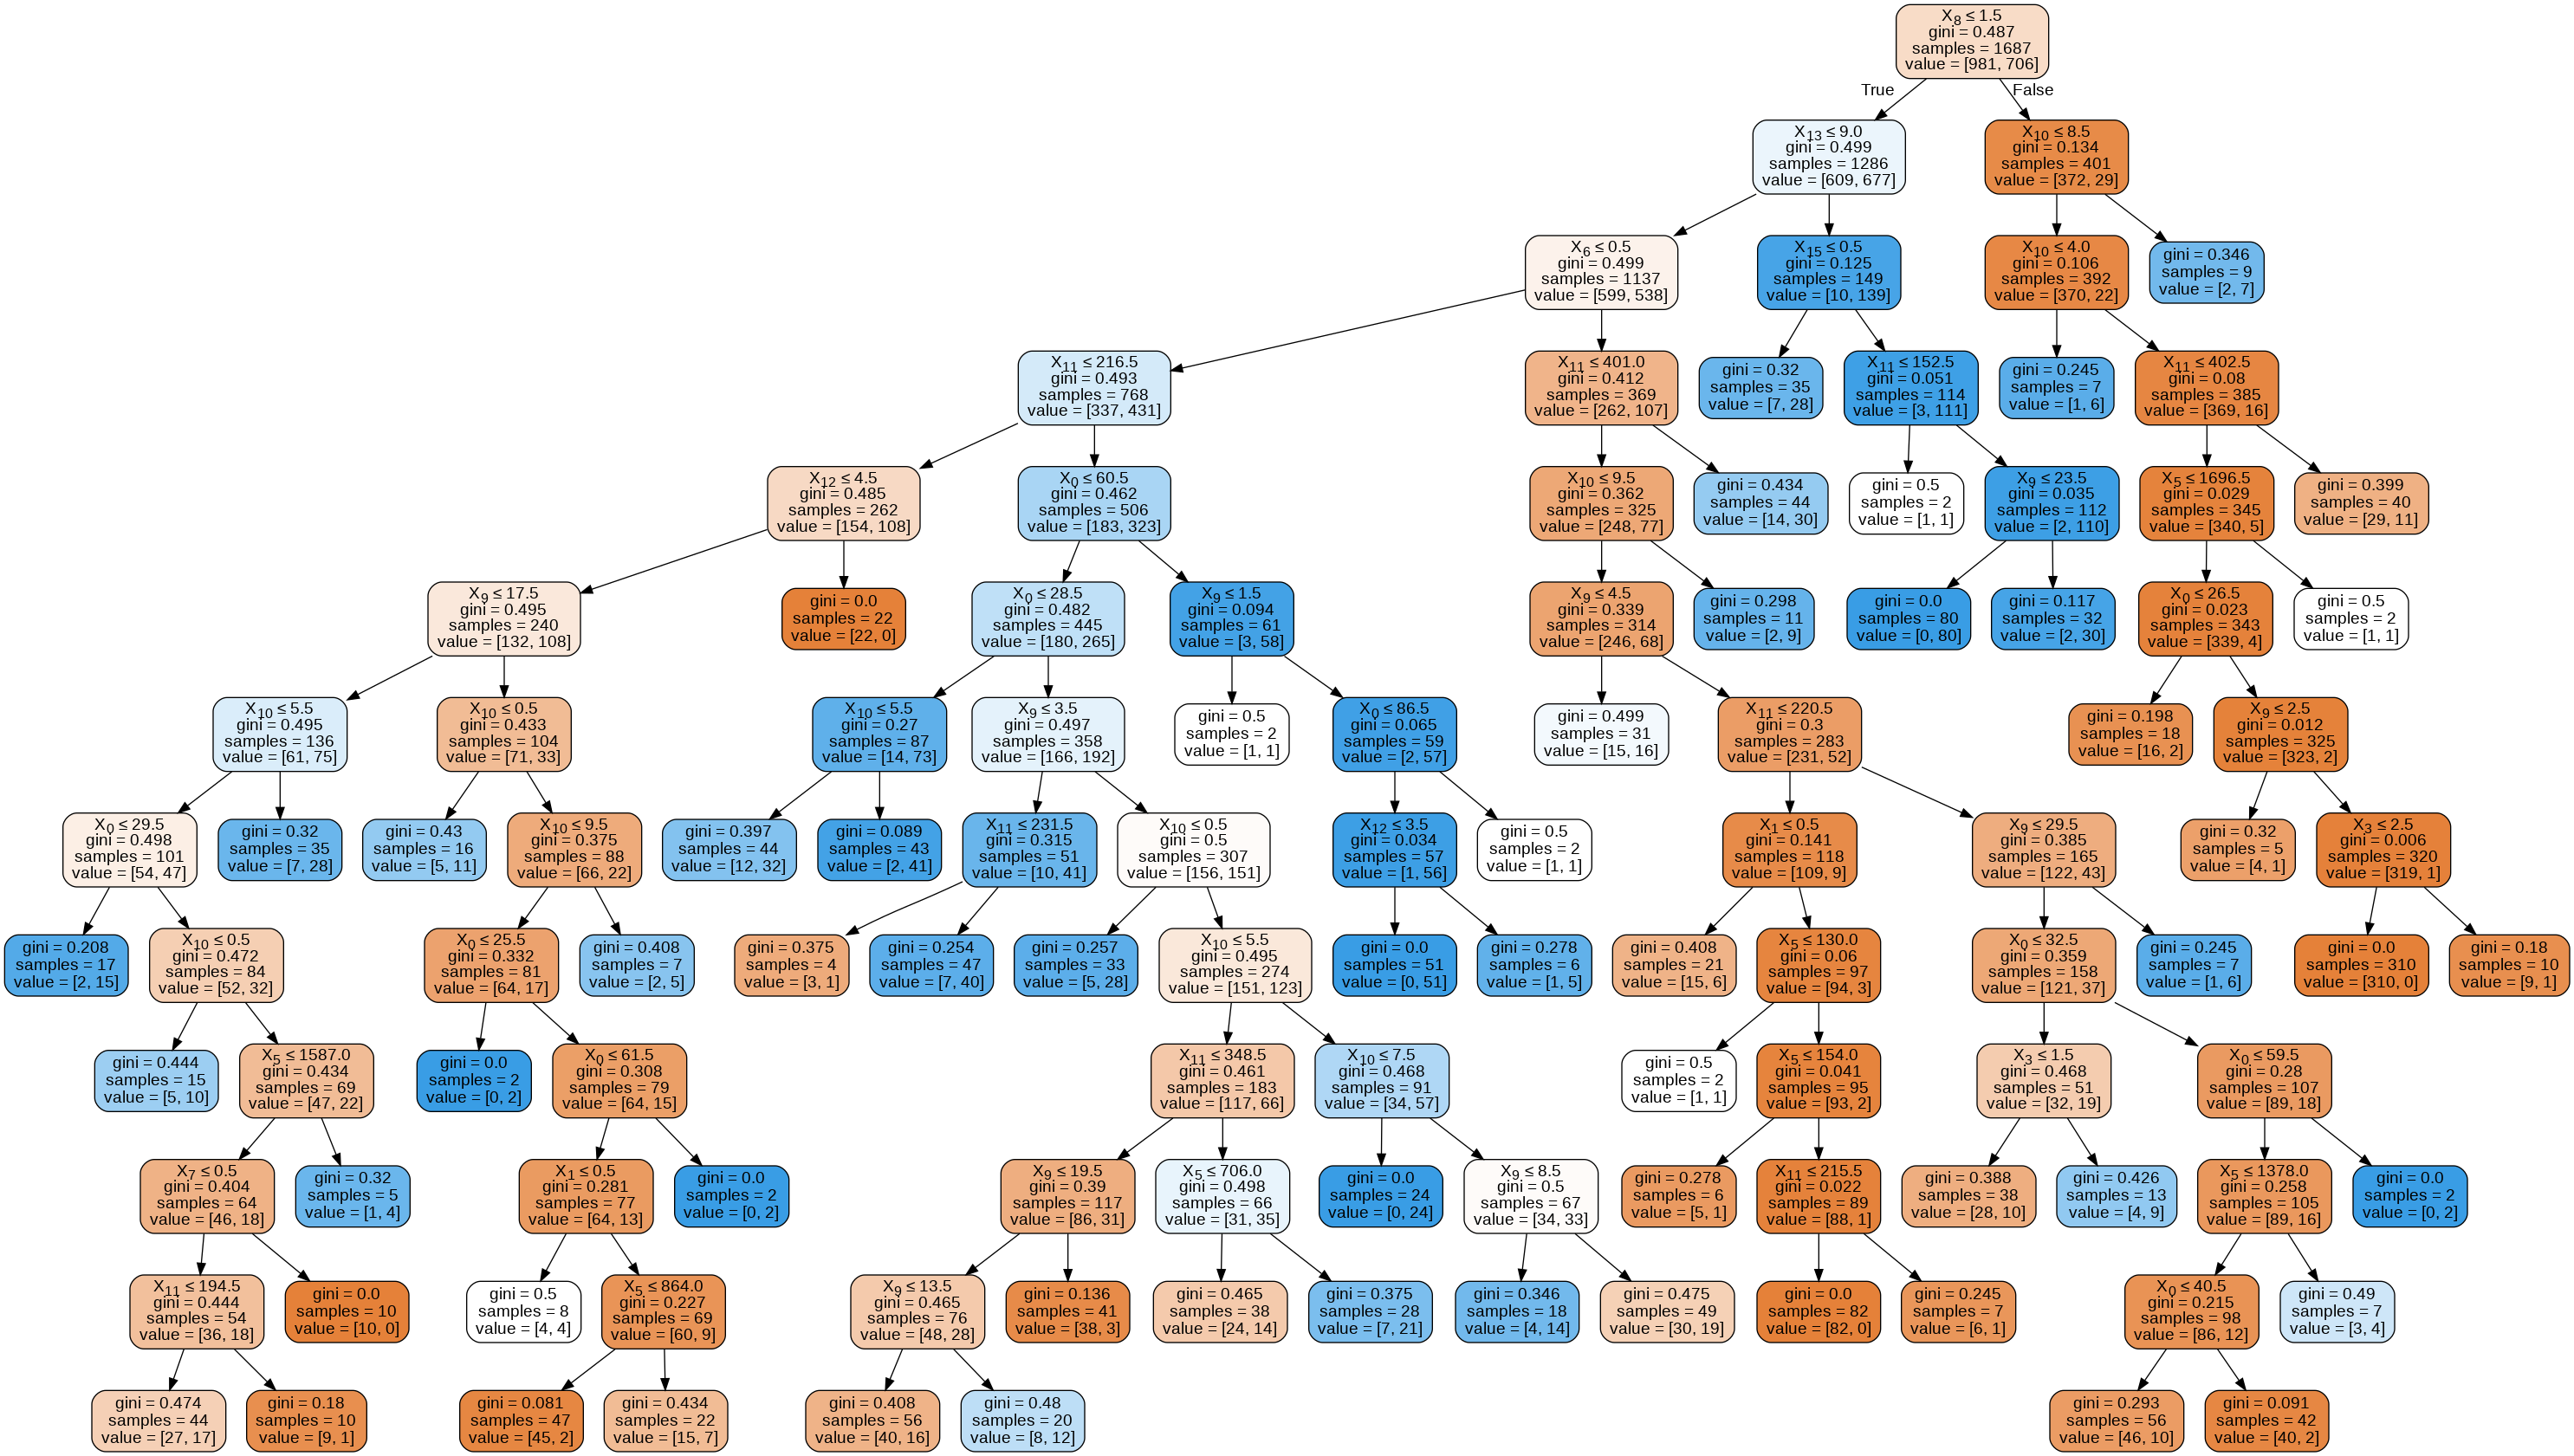

<Figure size 720x576 with 0 Axes>

In [ ]:
## Recheck the code

plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(dt,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Confusion matrix

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[209,  44],
       [ 46, 123]])

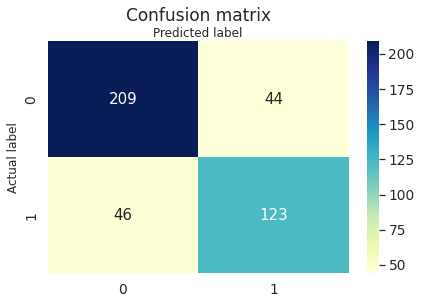

In [ ]:
## Confusion matrix without class labels

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1, fontsize=17)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label',fontsize=12)
plt.show()

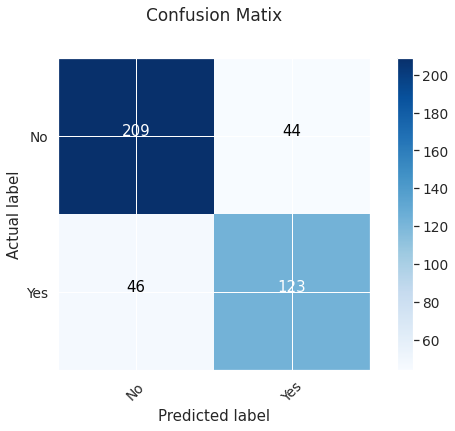

In [ ]:
## Confusion matrix with class labels

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model,normalize=False):
    cm = confusion_matrix(y_test,model,labels=[0,1])
    classes = ["No","Yes"]
    cmap = plt.cm.Blues
    title = "Confusion Matix"
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        cm = np.around(cm,decimals=3)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title,y=1.1, fontsize=17)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
plt.figure(figsize=(8,6))
plot_confusion_matrix(y_pred, normalize=False)
plt.show()

## Accuracy, Precision & Recall

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7867298578199052
Precision: 0.7365269461077845
Recall: 0.727810650887574


## ROC Curve & AUC

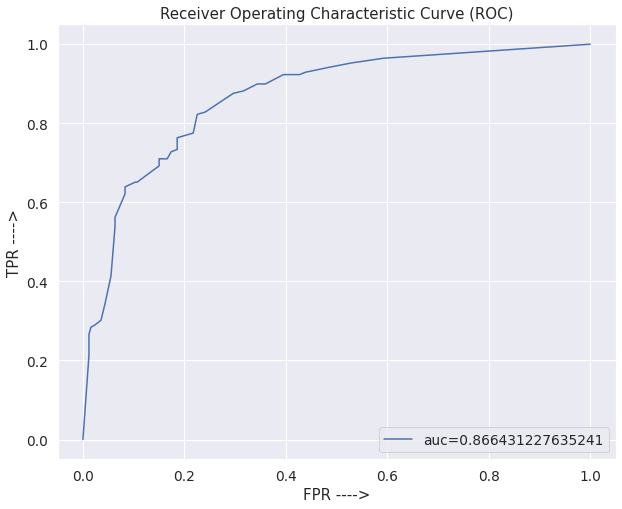

In [ ]:
## Method - 1

y_pred_proba = dt.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

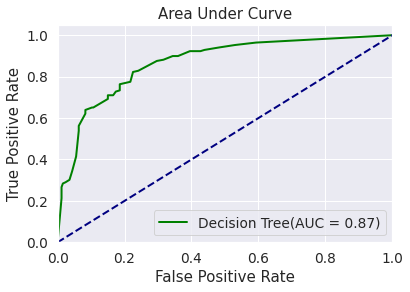

In [ ]:
# Method - 2

y_pred_proba_1 = dt.predict_proba(x_test)[:,1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_1)
roc_auc_dt = metrics.auc(fpr_dt, tpr_dt)

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Classification report

In [ ]:
target_names = ['No', 'Yes']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.82      0.83      0.82       253
         Yes       0.74      0.73      0.73       169

    accuracy                           0.79       422
   macro avg       0.78      0.78      0.78       422
weighted avg       0.79      0.79      0.79       422

